<a href="https://colab.research.google.com/github/audrb1999/ML-DL-Study/blob/main/%EC%8B%AC%EC%B8%B5%20%EC%8B%A0%EA%B2%BD%EB%A7%9D%20%EC%84%B1%EB%8A%A5%20%ED%96%A5%EC%83%81%EC%8B%9C%ED%82%A4%EA%B8%B0/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%EC%96%B4%ED%94%8C%EB%A6%AC%EC%BC%80%EC%9D%B4%EC%85%98%20%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/26._%EB%B0%B0%EC%B9%98_%EC%A0%95%EA%B7%9C%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 배치 정규화

딥러닝에서 가장 중요한 아이디어는 배치 정규화 알고리즘!

배치 정규화는 하이퍼파라미터 탐색을 쉽게 만들어줄 뿐만 아니라 신경망과 하이퍼파라미터의 상관관계를 줄여줍니다.

즉, 더 많은 하이퍼파라미터가 잘 작동합니다.

아주 깊은 심층 신경망이라도 아주 쉽게 학습할 수 있도록 도와줍니다.

입력 변수들을 정규화하면 학습이 빨라짐!



이렇게 단순한 구조라면 입력 데이터만 정규화하면되지만



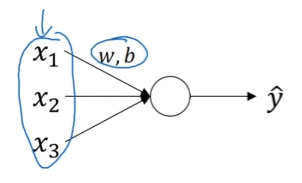

다음과 같은 구조라면 

$w_1$, $b_1$을 위해서는 $x_1$, $x_2$, $x_3$같은 입력 변수를 정규화 해주면 되지만 $w_2$, $b_2$나 $w_3$, $b_3$에 대해서는 $z_1$, $z_2$와 같이 이전층의 출력을 정규화 해주어야 합니다.


- 하지만 아직 $a1$을 해줘야하는지 $z1$을 해줘야하는지 논란이 있지만 일반적으로 후자를 많이 사용하므로 여기서는 $z1$을 정규화하는 것을 추천합니다. 

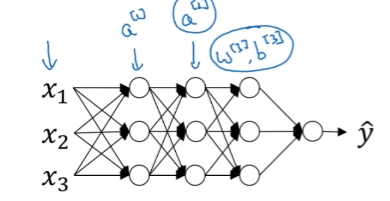

## 배치 정규화 구현

신경망에서 사잇값이 주어졌다고 할 떄

은닉 유닛의 값 $z^{(1)}$부터 $z^{(m)}$ 그리고 층 별로 값이 존재하니 

$z^{[l](i)}$

그럼 평균은 $\mu = \frac 1 m \Sigma z^{(i)}$

분산은 $\sigma =\frac 1 m \Sigma(z - \mu)^2 $

정규화는 $$z^{(i)}_{norm} = \frac {z^{(i)} - \mu} {\sqrt{\sigma^2 + \epsilon}}$$

자 이렇게해서 모든 z의 평균이 0이고 표준편차가 1이 되도록 만들었습니다.

> 항상 평균 0 표준편차 1을 가지는 것은 좋지않음!
> 은닉 유닛은 다양한 분포를 가져야하기에!

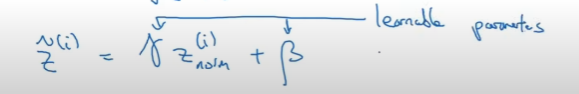


위에 ~는 틸다라고 읽음

틸다는 f(n) ~ g(n) 일 때 n이 무한대로 커지면  f(n) / g(n) = 1 


여기서 감마와 베타는 모델에서 학습시킬 수 있는 변수입니다.

경사 하강 모멘텀 아담 등등으로 학습시키면 됩니다.


감마와 베타를 사용하여 z틸다의 평균을 원하는 대로 설정할 수 있습니다.

$$z^{(i)}_{norm} = \frac {z^{(i)} - \mu} {\sqrt{\sigma^2 + \epsilon}}$$

여기서 감마가 위의 분모가되고, 베타가 $\mu$가 된다면 정규화 과정이 항등함수를 만드는 것과 똑같은 효과를 가지게 조절할 수도 있습니다.

이제 이렇게 정규화한 값을 이전 입력 변수와 바꿔서 넣으면 됩니다.

여기서 입력층과 은닉 유닛를 학습시킬 떄 차이점은 은닉 유닛값의 평균과 분산이 0, 1로 고정되면 안됩니다.

더 넓은 영역에 퍼져있어야 활성화 값들이 다양하게 나올 수 있습니다.


만약 평균이 0 분산이 1이라고 하고 시그모이드 함수를 활성화 함수로 쓴다고하면 

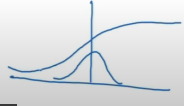

다음과 같이 0주변에 값(입력값)들이 포진되어있는 것을 볼 수 있습니다. 

시그모이드의 비선형성을 살릴 수 있도록 평균이 0이 아닌 다른 값을 갖게 하는 것이 좋습니다.

이것이 감마와 베타를 이용하여 원하는 범위의 값을 만들어내는 이유입니다.(값을 더 다양하게)

즉 은닉 유닛이 표준화된 평균과 분산을 갖되 평균과 분산은 학습 알고리즘에서 설정할 수 있는 두 변수 감마와 베타에 의해 조절 되는 것입니다.

이것을 쓰는 정확한 이유는 이후 두 강의를 들으면 이해할 수 있을 겁니다. 